In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# Plotly libraries
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split 

# Machine learning library
from pycaret.regression import *
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
import matplotlib.pyplot as plt

In [2]:
# data 
audi = pd.read_csv('input//used-car-dataset//audi.csv')
bmw = pd.read_csv('input//used-car-dataset//bmw.csv')
cclass = pd.read_csv('input//used-car-dataset//cclass.csv')
focus = pd.read_csv('input//used-car-dataset//focus.csv')
ford = pd.read_csv('input//used-car-dataset//ford.csv')
hyundai = pd.read_csv('input//used-car-dataset//hyundi.csv')
merc = pd.read_csv('input//used-car-dataset//merc.csv')
skoda = pd.read_csv('input//used-car-dataset//skoda.csv')
toyota = pd.read_csv('input//used-car-dataset//toyota.csv')
vauxhall = pd.read_csv('input//used-car-dataset//vauxhall.csv')
vw = pd.read_csv('input//used-car-dataset//vw.csv')

In [3]:
audi['manufacturer'] = 'Audi'
audi['has_tax'] = 1

bmw['manufacturer'] = 'BMW'
bmw['has_tax'] = 1

# cclass['manufacturer'] = 'Mercedes-Benz'
cclass['manufacturer'] = 'Mercedes'
cclass['has_tax'] = 0
cclass['tax'] = np.nan

focus['manufacturer'] = 'Ford'
focus['has_tax'] = 0
focus['tax'] = np.nan

hyundai['manufacturer'] = 'Hyundai Motor'
hyundai['has_tax'] = 1
hyundai = hyundai.rename(columns={"tax(£)": "tax"})

merc['manufacturer'] = 'Mercedes'
merc['has_tax'] = 1

skoda['manufacturer'] = 'Skoda'
skoda['has_tax'] = 1

toyota['manufacturer'] = 'Toyota'
toyota['has_tax'] = 1

vauxhall['manufacturer'] = 'Vauxhall'
vauxhall['has_tax'] = 1

vw['manufacturer'] = 'Volkswagen'
vw['has_tax'] = 1

In [4]:
# aggregation
cars = pd.concat([audi, bmw, cclass, focus, hyundai, merc, skoda, toyota, vauxhall, vw], ignore_index=True)
# cars.drop( columns=['Make'] )

# dimensionality
type(cars)

pandas.core.frame.DataFrame

In [5]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer,has_tax
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi,1
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi,1
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi,1
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi,1
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi,1
...,...,...,...,...,...,...,...,...,...,...,...
90570,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Volkswagen,1
90571,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Volkswagen,1
90572,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Volkswagen,1
90573,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Volkswagen,1


In [6]:
from datetime import datetime

currentYear = datetime.now().year

print('Current Year: ' , currentYear)

Current Year:  2023


In [7]:
cars['Age'] = currentYear - cars['year']
cars_no_nan = cars.dropna()

cars_no_nan

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer,has_tax,Age
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi,1,6
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi,1,7
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi,1,7
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi,1,6
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
90570,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,Volkswagen,1,11
90571,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,Volkswagen,1,15
90572,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,Volkswagen,1,14
90573,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,Volkswagen,1,17


Perform get_dummy on items with claasification

In [31]:
cars_pd_gear = pd.get_dummies(cars_no_nan, columns = ['transmission', 'fuelType'])

In [32]:
cars_pd_gear

,model,year,price,mileage,tax,mpg,engineSize,manufacturer,has_tax,Age,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,A1,2017,12500,15735,150.0,55.4,1.4,Audi,1,6,0,1,0,0,0,0,0,0,1
1,A6,2016,16500,36203,20.0,64.2,2.0,Audi,1,7,1,0,0,0,1,0,0,0,0
2,A1,2016,11000,29946,30.0,55.4,1.4,Audi,1,7,0,1,0,0,0,0,0,0,1
3,A4,2017,16800,25952,145.0,67.3,2.0,Audi,1,6,1,0,0,0,1,0,0,0,0
4,A3,2019,17300,1998,145.0,49.6,1.0,Audi,1,4,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90570,Eos,2012,5990,74000,125.0,58.9,2.0,Volkswagen,1,11,0,1,0,0,1,0,0,0,0
90571,Fox,2008,1799,88102,145.0,46.3,1.2,Volkswagen,1,15,0,1,0,0,0,0,0,0,1
90572,Fox,2009,1590,70000,200.0,42.0,1.4,Volkswagen,1,14,0,1,0,0,0,0,0,0,1
90573,Fox,2006,1250,82704,150.0,46.3,1.2,Volkswagen,1,17,0,1,0,0,0,0,0,0,1


In [33]:
cars_dummied = cars_pd_gear[ ['price', 'Age', 'mileage', 'mpg', 'engineSize', 'transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'] ] 

In [34]:
cars_dummied

,price,Age,mileage,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,12500,6,15735,55.4,1.4,0,1,0,0,0,0,0,0,1
1,16500,7,36203,64.2,2.0,1,0,0,0,1,0,0,0,0
2,11000,7,29946,55.4,1.4,0,1,0,0,0,0,0,0,1
3,16800,6,25952,67.3,2.0,1,0,0,0,1,0,0,0,0
4,17300,4,1998,49.6,1.0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90570,5990,11,74000,58.9,2.0,0,1,0,0,1,0,0,0,0
90571,1799,15,88102,46.3,1.2,0,1,0,0,0,0,0,0,1
90572,1590,14,70000,42.0,1.4,0,1,0,0,0,0,0,0,1
90573,1250,17,82704,46.3,1.2,0,1,0,0,0,0,0,0,1


In [35]:
y = cars_dummied['price']
X_dummied = cars_dummied.drop('price', axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X_dummied, y, random_state=14, test_size=0.3  )

In [37]:
print(len(X_train))
print(len(y_train))

56855
56855


In [38]:
X_train

,Age,mileage,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
83625,5,9529,60.1,1.0,0,1,0,0,0,0,0,0,1
79837,7,64000,47.1,2.0,0,1,0,0,0,0,0,0,1
20016,8,35284,34.0,3.0,1,0,0,0,0,0,0,0,1
12377,4,2973,30.4,2.0,0,0,0,1,0,0,0,0,1
84583,6,6913,60.1,1.2,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87923,6,26718,64.2,1.0,0,1,0,0,0,0,0,0,1
54146,5,9705,57.7,2.0,1,0,0,0,1,0,0,0,0
32208,7,13971,60.1,1.0,0,1,0,0,0,0,0,0,1
9484,4,2011,45.6,2.0,1,0,0,0,1,0,0,0,0


In [ ]:
Using OLS Refression as a Starting Regression Algorithm

In [39]:
#X_train_scaled = X_train[  ['Age', 'mileage', 'mpg', 'engineSize', 'transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'] ]
X_train_data = X_train[  ['Age', 'mileage', 'mpg', 'engineSize'] ]

print(X_train_data.iloc[0])
#X_train_scaled[  ['Age', 'mileage', 'mpg', 'engineSize', 'transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'] ] = scale.fit_transform( X_train_scaled[  ['Age', 'mileage', 'mpg', 'engineSize', 'transmission_Automatic', 'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'] ].values)
X_train_scale = X_train_data.copy()
X_train_scale[  ['Age', 'mileage', 'mpg', 'engineSize'] ] = scale.fit_transform( X_train_scale[  ['Age', 'mileage', 'mpg', 'engineSize'] ].values) 
y = y_train
X_train_scale = sm.add_constant(X_train_scale)

estimate = sm.OLS( y, X_train_scale ).fit()
print (estimate.summary())

Age              5.0
mileage       9529.0
mpg             60.1
engineSize       1.0
Name: 83625, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 3.326e+04
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:35:09   Log-Likelihood:            -5.7206e+05
No. Observations:               56855   AIC:                         1.144e+06
Df Residuals:                   56850   BIC:                         1.144e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [40]:
type(y_train)

pandas.core.series.Series

In [41]:
y_train

83625    11412
79837    16750
20016    26499
12377    34222
84583    12725
         ...  
87923     6962
54146    18400
32208     5992
9484     29990
88545    12142
Name: price, Length: 56855, dtype: int64

In [42]:
def predict_mini(row_vals):
    scaled = scale.transform([ row_vals ] )
    scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
    scaled = scale.transform([ row_vals ] )
    print(scaled)
    predicted = estimate.predict(scaled)
    return predicted

In [43]:
test = 0
print (y_train.iloc[test] )

11412


In [44]:
testval = X_train_data.iloc[test].values.tolist()

testval

[5.0, 9529.0, 60.1, 1.0]

In [45]:
scaled = scale.transform( [ testval ]   )
scaled = np.insert(scaled[0], 0, 1) 
print(scaled)
predicted = estimate.predict(scaled)
print(predicted)

[ 1.         -0.40432124 -0.62708684  0.31951525 -1.31605248]
[11549.76522268]


In [46]:
test = 255

In [47]:
testval = X_train_data.iloc[test].values.tolist()

In [48]:
print (y_train.iloc[test] )

scaled = scale.transform( [ testval ]   )
scaled = np.insert(scaled[0], 0, 1) 
print(scaled)
predicted = estimate.predict(scaled)
print(predicted)

10350
[ 1.          0.06055538  0.17419931  0.25004069 -0.41879203]
[14187.12797908]


In [49]:
list_pred_sells = []


def pred_mini_df( df_rows) :
    for df_rowx in df_rows :
        
        scale_rowx = scale.transform( [df_rowx] )
        scale_rowx = np.insert(scale_rowx[0], 1, 1 )
        rowx_pred  = estimate.predict(scale_rowx)
        list_pred_sells.append(rowx_pred)
    return list_pred_sells

In [50]:
list_xtrain = X_train_data.values.tolist()

pred_list_xtrain = pred_mini_df(list_xtrain)


In [51]:
list_made_sells = []
xindex          = []
list_pred_sale  = []

for i in range( len( pred_list_xtrain) ):

    pred_pricex = int(pred_list_xtrain[i][0] )
    
    x_linex     = i
    xindex.append( i )
    list_pred_sale.append(pred_pricex)    

In [54]:
# Using a subset of training data, to plot and see Predicted vs Actaul sell prices.

x_200_index = xindex[:101]
y_200_predx = list_pred_sale[:101]
y_200_price = y_train[:101]

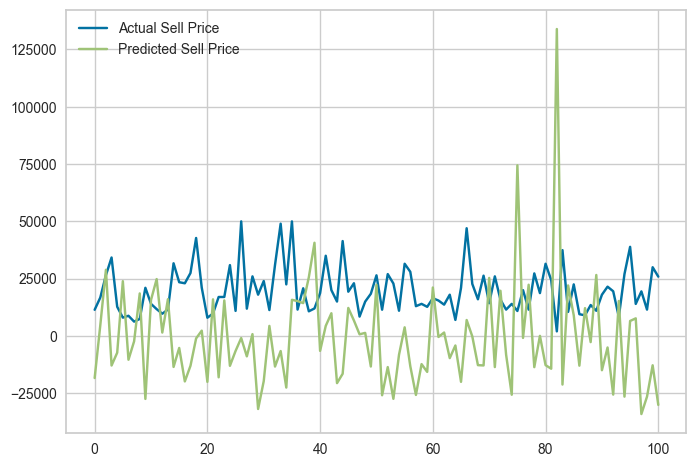

In [53]:
plt.plot(x_200_index, y_200_price, label = "Actual Sell Price") 
plt.plot(x_200_index, y_200_predx, label = "Predicted Sell Price") 
plt.legend() 
plt.show()

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

print("R2 score : %.2f" % r2_score(y_train, list_pred_sale))
print("Mean squared error: %.2f" % mean_squared_error(y_train, list_pred_sale))

R2 score : -7.75
Mean squared error: 939337202.88


Now lets apply this to the test data

In [62]:
X_test_data = X_test[  ['Age', 'mileage', 'mpg', 'engineSize'] ]

list_xtest = X_test_data.values.tolist()
print( len(list_xtest))

pred_list_xtest = pred_mini_df(list_xtest)
print(len(pred_list_xtest))

24367
129956


In [61]:
print("R2 score : %.2f" % r2_score(y_test, pred_list_xtest))
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred_list_xtest))

ValueError: Found input variables with inconsistent numbers of samples: [24367, 105589]